# Поиск истины в вине

<img src="https://i.pinimg.com/originals/35/fd/2f/35fd2fdccb58c2250241113f12b55d14.jpg" width="300">


**Предобработка данных**

	- Загрузите данные в Pandas DataFrame.
	- Посчитайте размерность данных (количество строк и стоблцов).
	- Посчитайте количество пропущенных значений в каждой переменной.
	- Выведите тип данных каждой переменной. Переконвертируйте при необходимости.
    - Вина какой области (`province`) получают наилучшие рейтинги? 
	- На основе словаря `color` оздайте переменную, в которой закодирован цвет вина (например, при помощи метода [`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) или другого).
    - Удалите наблюдения для которых цвет (`color`) не указан.
	- Визуализируйте распределения числовых переменных.
	- Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? (Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.
	


**Указывайте в коде, какой пункт начали выполнять.**

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
df=pd.read_csv('wine_reviews.csv') # читаем файл данных
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "red",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}
df.shape  #№1размерность данных


(20000, 10)

In [2]:
(df.isna().sum())*100/len(df) #№2 количество пропущенных значений в процентах

country         0.000
description     0.000
designation    30.005
points          0.000
price           9.010
province        0.000
region_1       17.285
region_2       59.710
variety         0.000
winery          0.000
dtype: float64

In [3]:
sns.set()
df.dtypes #№3тип данных

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [4]:
df.dropna(axis='index',subset=['price'],inplace=True)
df.drop(columns=['designation','region_1','region_2'],inplace=True)
df.columns

Index(['country', 'description', 'points', 'price', 'province', 'variety',
       'winery'],
      dtype='object')

<Axes: >

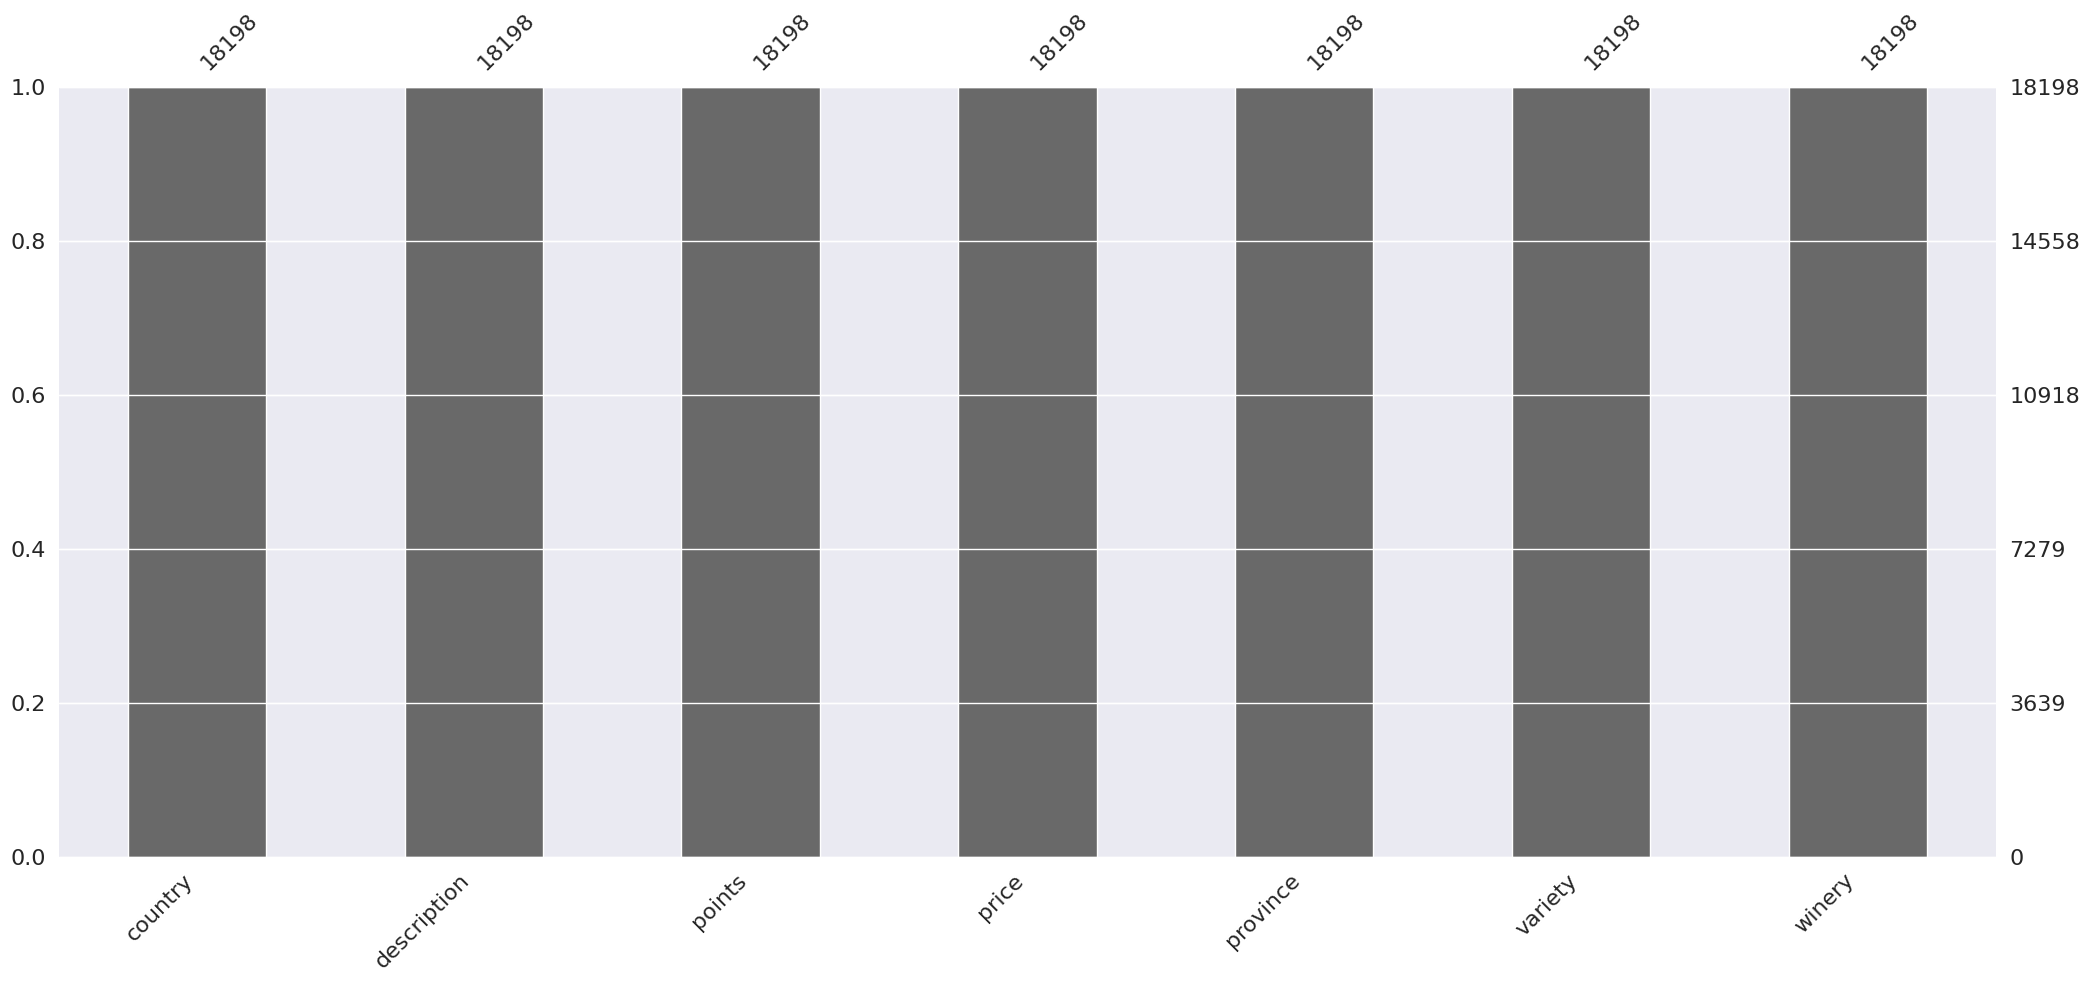

In [5]:
msno.bar(df)

In [6]:
#№4 Вина какой области (`province`) получают наилучшие рейтинги?
df.sort_values(by='points',ascending=False).head()

,country,description,points,price,province,variety,winery
5955,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Merlot,Tenuta dell'Ornellaia
323,France,A wine that has created its own universe. It h...,100,1400.0,Champagne,Chardonnay,Krug
17967,US,Impossibly aromatic. Hard to imagine greater c...,100,245.0,California,Cabernet Blend,Sloan
7306,US,The only one of the Cayuse Syrahs that is co-f...,99,65.0,Oregon,Syrah,Cayuse
13188,France,"A big, powerful wine that sums up the richness...",99,2300.0,Bordeaux,Bordeaux-style Red Blend,Château Latour


In [7]:
#На основе словаря `color` создайте переменную,
#в которой закодирован цвет вина
df['color']=df['variety'].map(color)

In [8]:
df.head()

,country,description,points,price,province,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",86,23.0,California,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,96,275.0,Tuscany,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,91,40.0,Bordeaux,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",83,25.0,Oregon,Pinot Noir,Deer Creek,red


In [9]:
df.dropna(axis='index',subset=['color'],inplace=True)

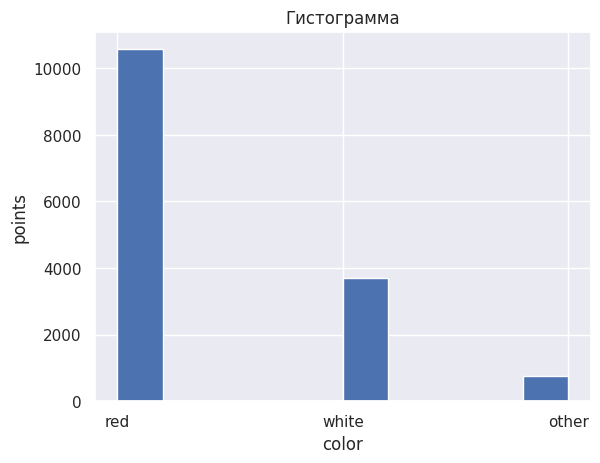

In [10]:
# Построение гистограммы значения столбца color
plt.hist(df['color'])
plt.xlabel('color')
plt.ylabel('points')
plt.title('Гистограмма')
plt.show()

<Axes: xlabel='color', ylabel='points'>

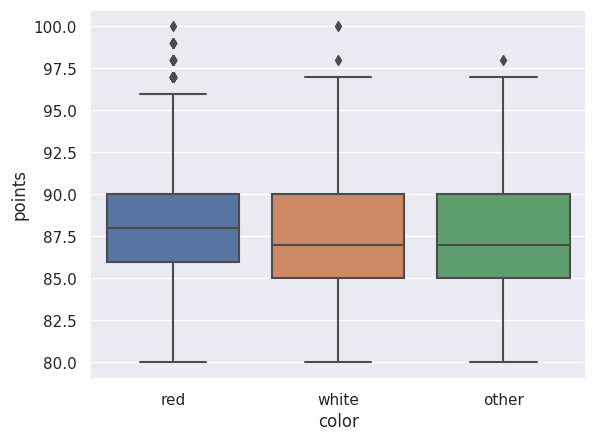

In [11]:
# Построение ящика с усами для столбца
sns.boxplot(x='color',y='points',data=df,)
#sns.xlabel('color')
#plt.ylabel('points')
#plt.title('Ящик с усами')
#plt.show()

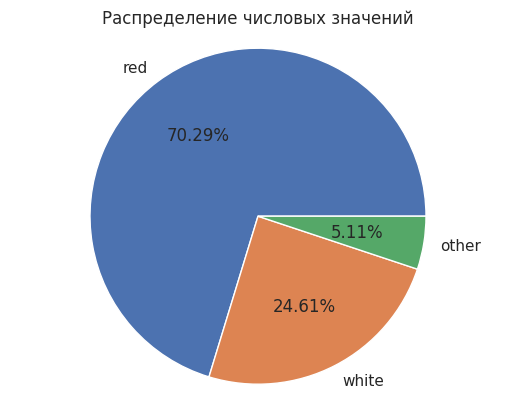

In [12]:
# Построение круговой диаграммы
value_counts = df['color'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.2f%%')
plt.axis('equal')  # Сохранение круговой формы диаграммы
plt.title('Распределение числовых значений')
plt.show()


In [13]:
# Получение уникальных значений столбца 'country'
unique_country = df['country'].unique()
unique_color = df['color'].unique()
print(*unique_country)
print(*unique_color)
df.groupby(['country','color'])['color'].describe()
#color_filters = []
#for colorTMP in unique_color:
#    color_filter = df['color'] == colorTMP
#    color_filters.append(color_filter)
#print(*color_filters)
# Группировка данных по 'country' и подсчет числа элементов для каждого цветового фильтра
#color_counts = df.groupby('country')[color_filters].sum()

#print(color_counts)

    # Построение круговой диаграммы
    
    #plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    #plt.axis('equal')  # Сохранение круговой формы диаграммы
    #plt.title('Распределение числовых значений')
    #plt.show()


US Italy France Austria Chile Australia South Africa Spain New Zealand Portugal Argentina Germany Greece Canada Israel Romania Croatia Lebanon China Hungary Bulgaria Cyprus Switzerland Georgia Uruguay Turkey Mexico Slovenia Moldova Ukraine Brazil US-France Luxembourg
red white other


count unique    top  freq
country   color                          
Argentina other    12      1  other    12
          red     522      1    red   522
          white    87      1  white    87
Australia other    14      1  other    14
          red     356      1    red   356
...               ...    ...    ...   ...
US        white  1811      1  white  1811
US-France white     1      1  white     1
Ukraine   other     1      1  other     1
Uruguay   red       4      1    red     4
          white     1      1  white     1

[76 rows x 4 columns]

In [14]:
(df.isna().sum())*100/len(df) # количество пропущенных значений в процентах


country        0.0
description    0.0
points         0.0
price          0.0
province       0.0
variety        0.0
winery         0.0
color          0.0
dtype: float64

In [21]:
for colorTMP in unique_color:
    print("Количество разновидностей вина - ",colorTMP)
    print()
    ae=df[df['color'] == colorTMP].groupby('country')
    print(ae.size())
    print('Максимальное количество вина', colorTMP,"-",ae.size().max(),".Страна - ", ae.size().idxmax())
    print('________________________________________________')


Количество разновидностей вина -  red

country
Argentina        522
Australia        356
Austria           80
Bulgaria           6
Canada            16
Chile            501
Croatia            2
Cyprus             5
France           804
Germany          317
Greece            28
Hungary            7
Israel            53
Italy           1266
Lebanon            1
Luxembourg         1
Mexico             6
Moldova            6
New Zealand      184
Portugal         366
Romania           13
Slovenia           5
South Africa     141
Spain            420
Switzerland        1
Turkey             5
US              5456
Uruguay            4
dtype: int64
Максимальное количество вина red - 5456 .Страна -  US
________________________________________________
Количество разновидностей вина -  white

country
Argentina         87
Australia        133
Austria          152
Bulgaria           3
Canada             3
Chile            201
China              2
Croatia            3
Cyprus             1
France     

In [22]:
df.groupby('country').size()
        

country
Argentina        621
Australia        503
Austria          238
Brazil             2
Bulgaria           9
Canada            19
Chile            715
China              2
Croatia            6
Cyprus             6
France          1667
Georgia            2
Germany          325
Greece            51
Hungary           12
Israel            78
Italy           1521
Lebanon            3
Luxembourg         1
Mexico             9
Moldova           12
New Zealand      411
Portugal         501
Romania           15
Slovenia           8
South Africa     243
Spain            595
Switzerland        1
Turkey             5
US              7453
US-France          1
Ukraine            1
Uruguay            5
dtype: int64

In [23]:
for colorTMP in unique_color:
    print("Количество разновидностей вина - ",colorTMP)
    a=df.groupby('country').size()
    
    result = df[df['color'] == colorTMP].groupby('country').size()
    # Проверка, нет ли NaN в результирующем последовательности
    is_not_null = pd.notnull(result)
    if is_not_null.all():
       b=df[df['color'] == colorTMP].groupby('country').size()
    else:
        b=0
    
    print(b/a)
    print('________________________________________________')

Количество разновидностей вина -  red
country
Argentina       0.840580
Australia       0.707753
Austria         0.336134
Brazil               NaN
Bulgaria        0.666667
Canada          0.842105
Chile           0.700699
China                NaN
Croatia         0.333333
Cyprus          0.833333
France          0.482304
Georgia              NaN
Germany         0.975385
Greece          0.549020
Hungary         0.583333
Israel          0.679487
Italy           0.832347
Lebanon         0.333333
Luxembourg      1.000000
Mexico          0.666667
Moldova         0.500000
New Zealand     0.447689
Portugal        0.730539
Romania         0.866667
Slovenia        0.625000
South Africa    0.580247
Spain           0.705882
Switzerland     1.000000
Turkey          1.000000
US              0.732054
US-France            NaN
Ukraine              NaN
Uruguay         0.800000
dtype: float64
________________________________________________
Количество разновидностей вина -  white
country
Argentina       0

In [24]:
for colorTMP in unique_color:
    print("Количество разновидностей вина - ", colorTMP)
    a = df.groupby('country').size()

    result = df[df['color'] == colorTMP].groupby('country').size()
    
    b = result.reindex(a.index, fill_value=0)
    b = b.div(a, fill_value=0)
    print(b)
    print()
    #max_country = b.idxmax()  # Индекс страны с максимальной долей
    #max_value = b.max()  # Максимальная доля

    if colorTMP == "red":
        print("Максимальная доля производства красного вина в странах:")
        print(b[b[:]==b.max()])
    elif colorTMP == "white":
            print("Максимальная доля производства белого вина в странах:")
            print(b[b[:]==b.max()])
    else:
        print("Максимальная доля производства  вина другого цвета в странах:")
        print(b[b[:]==b.max()])
    
    print('________________________________________________')


Количество разновидностей вина -  red
country
Argentina       0.840580
Australia       0.707753
Austria         0.336134
Brazil          0.000000
Bulgaria        0.666667
Canada          0.842105
Chile           0.700699
China           0.000000
Croatia         0.333333
Cyprus          0.833333
France          0.482304
Georgia         0.000000
Germany         0.975385
Greece          0.549020
Hungary         0.583333
Israel          0.679487
Italy           0.832347
Lebanon         0.333333
Luxembourg      1.000000
Mexico          0.666667
Moldova         0.500000
New Zealand     0.447689
Portugal        0.730539
Romania         0.866667
Slovenia        0.625000
South Africa    0.580247
Spain           0.705882
Switzerland     1.000000
Turkey          1.000000
US              0.732054
US-France       0.000000
Ukraine         0.000000
Uruguay         0.800000
dtype: float64

Максимальная доля производства красного вина в странах:
country
Luxembourg     1.0
Switzerland    1.0
Turkey     

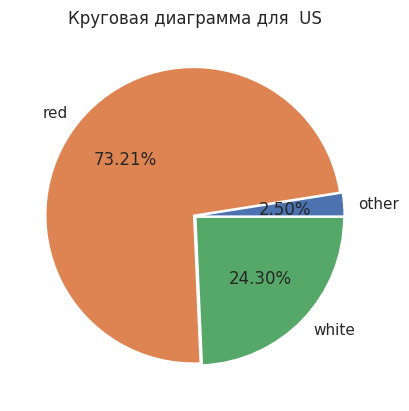

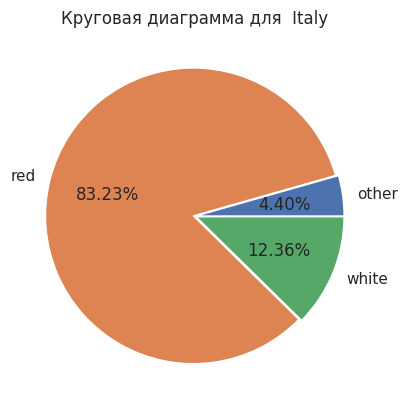

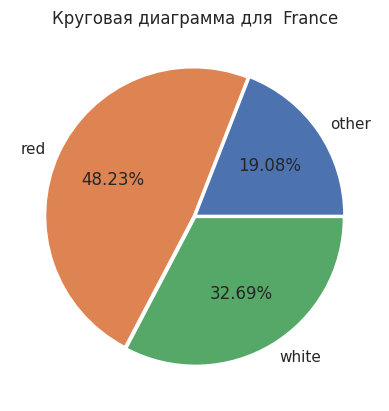

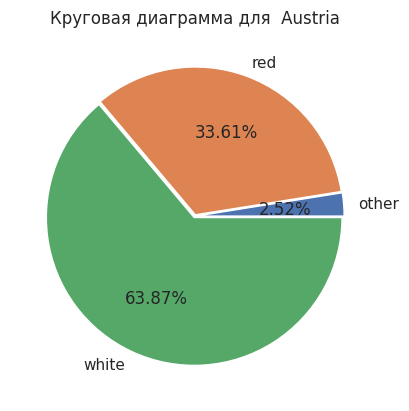

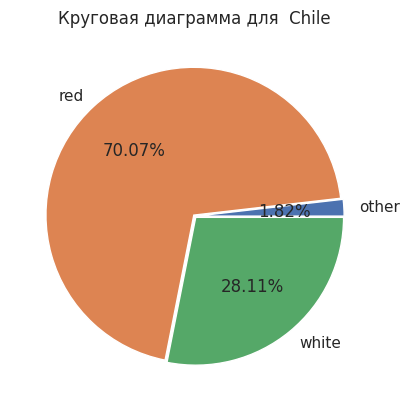

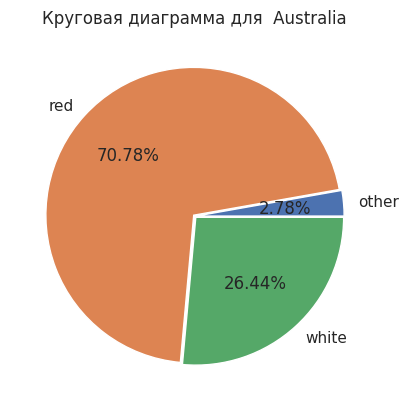

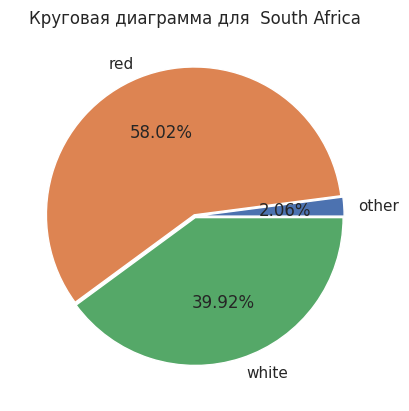

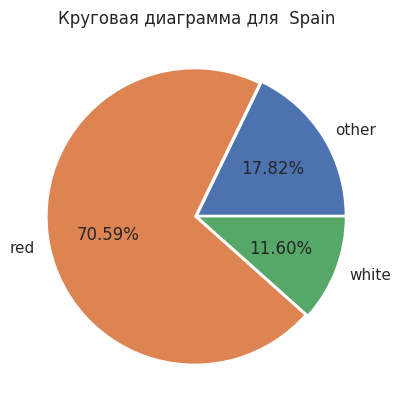

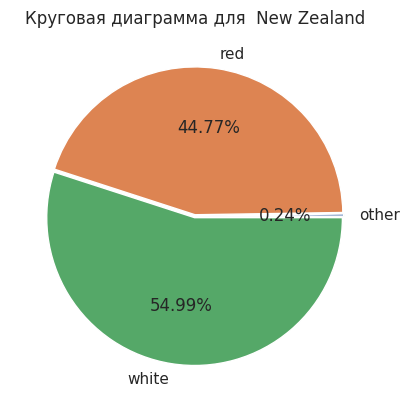

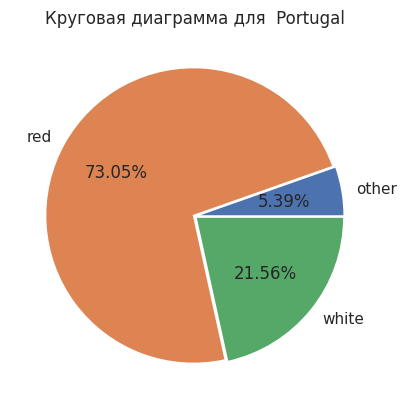

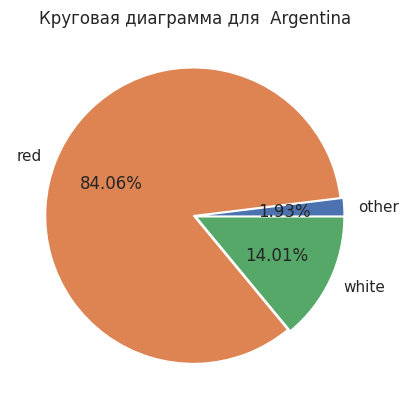

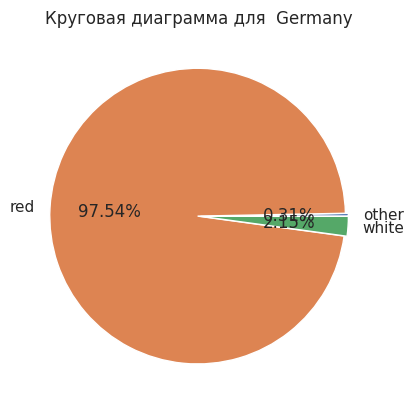

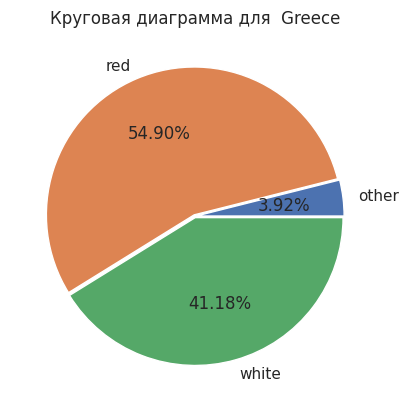

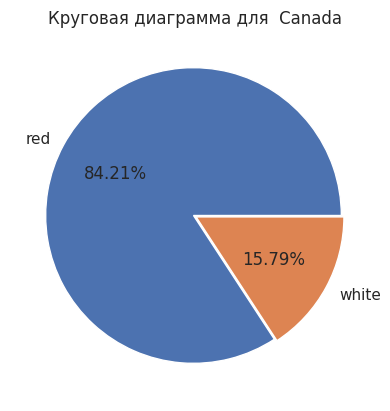

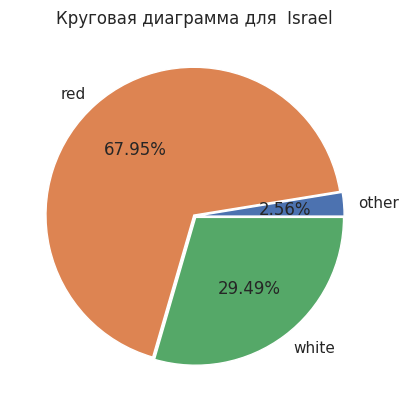

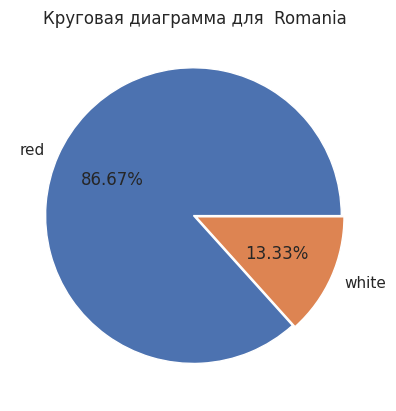

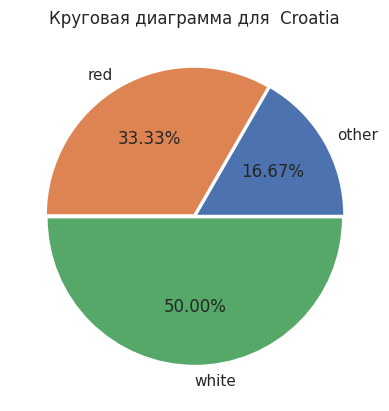

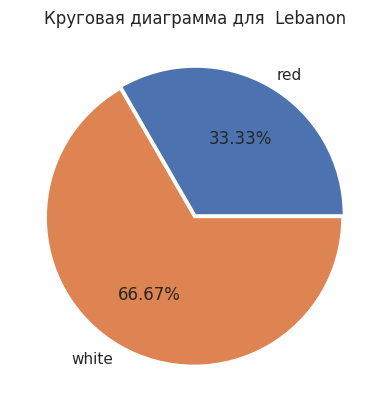

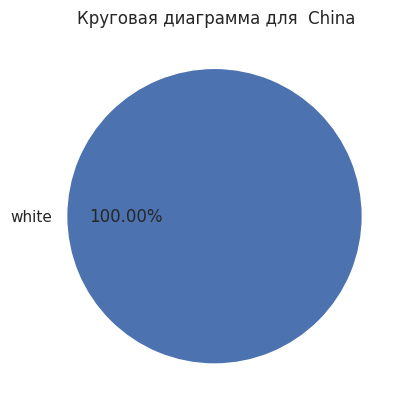

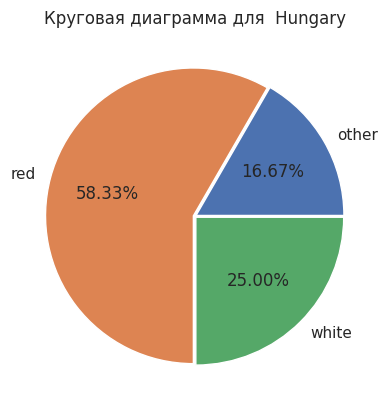

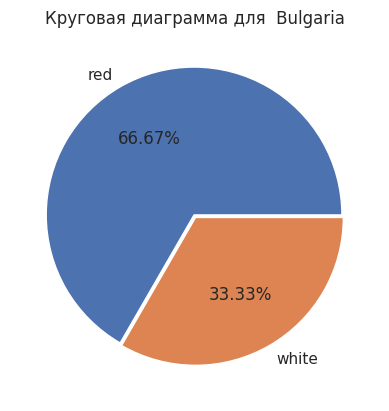

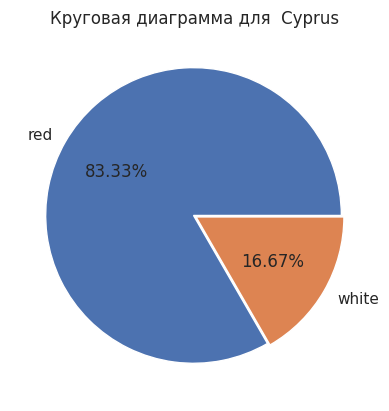

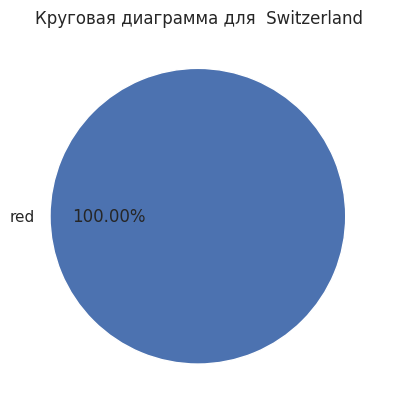

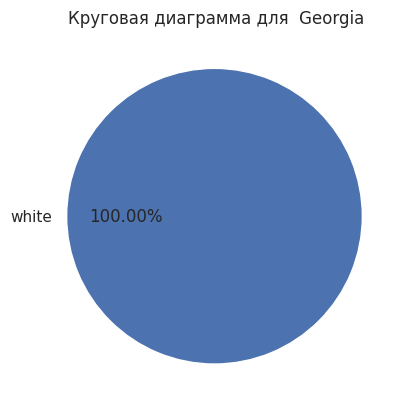

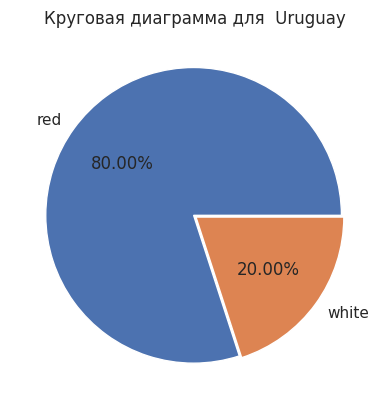

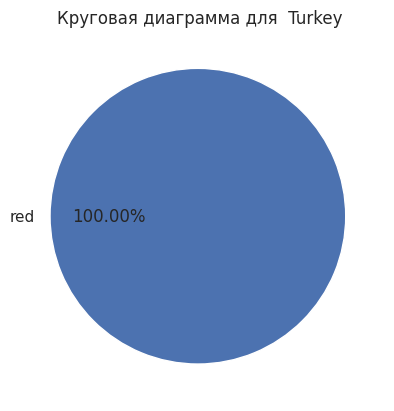

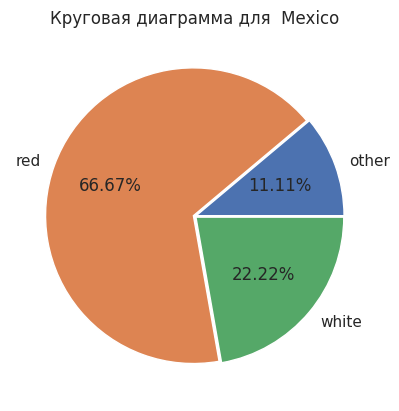

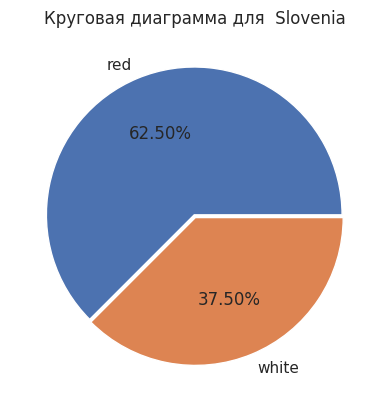

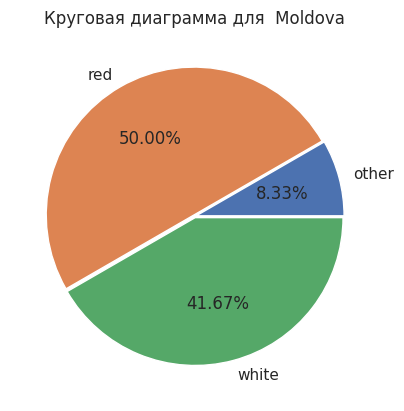

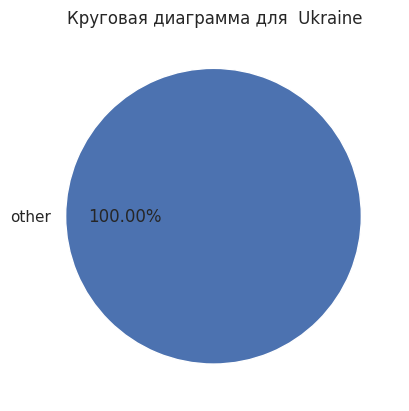

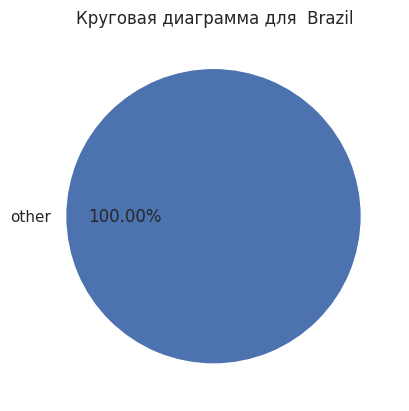

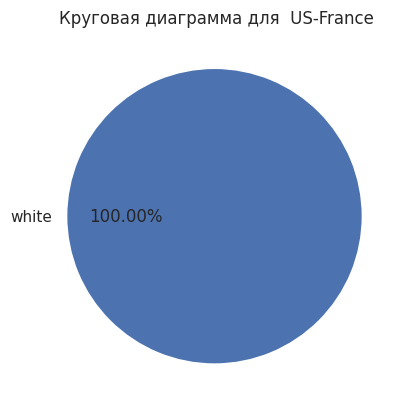

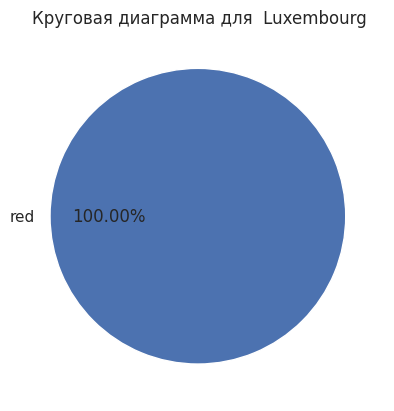

In [25]:
# круговые диаграммы производства вин по странам и по цвету
for countryTMP in unique_country:
    plt.figure()  # Создаем новую фигуру для каждого значения 'country'
    plt.title(f"Круговая диаграмма для  {countryTMP}")
    
    result = df[df['country'] == countryTMP].groupby('color').size()
    
    
    explode = [0.01] * len(result)  # Настройка отступа для секторов диаграммы
    plt.pie(result, labels=result.index, explode=explode, autopct='%1.2f%%')
    plt.show()